In [2]:
import wave
import matplotlib.pyplot as plt
import numpy as np

import scipy as sp
from scipy import signal

In [3]:
def read_wave(file_name):
    file = wave.open(file_name,'rb')
    params = file.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
#     print("nchannels:", nchannels)
#     print("sampwidth:", sampwidth)
#     print("framerate:", framerate)
#     print("nframes:", nframes)
    strData = file.readframes(nframes)  # encoded in bytes
    file.close()
    waveData = np.frombuffer(strData, dtype=np.int16)  # convert to int16
    return waveData, framerate, nframes


def plot_wave(signal, framerate, title):
    time = np.arange(0, signal.size) * (1.0 / framerate)
    plt.figure(figsize=(6, 3))
    plt.plot(time, signal)
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.grid('on')
    plt.savefig('./Experiment1_fig/{}.png'.format(title))
    plt.show()

def specgram_wave(signal, framerate):
    plt.specgram(signal, Fs=framerate, cmap="rainbow")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (s)")
    plt.title("Spectrogram")
    plt.savefig('./Experiment1_fig/Spectrogram.png')
    plt.show()
    
def psd_wave(signal, framerate):
    plt.psd(signal, Fs=framerate)
    plt.savefig('./Experiment1_fig/psd.png')
    plt.show()
    
# Fast Fourier Transform at selected time interval
def fft_wave(signal, framerate, time_interval):
    time = np.arange(0, signal.size) * (1.0 / framerate)
    
    plt.subplot(2,1,1)
    plt.plot(time, signal)
    plt.fill_between(time_interval,np.min(signal),np.max(signal),color="pink")
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.grid('on')
    
    
    start_time, end_time = time_interval
#     start_index = np.where(time == start_time)
    select_time = time[(time>=start_time) & (time<=end_time)]
    select_signal = signal[(time>=start_time) & (time<=end_time)]
    fft_signal = np.fft.fft(select_signal)
    
    t = np.arange(select_signal.size)
    freq = np.fft.fftfreq(t.shape[-1])
    freq_in_Hz = abs(freq * framerate)
    
    plt.subplot(2,1,2)
    plt.plot(freq_in_Hz,np.abs(fft_signal))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (a.u.)")
    
#     fft_signal = np.abs(fft_signal)
#     freq_in_Hz = np.fft.fftfreq(select_signal.size,1/framerate)
#     plt.plot(freq_in_Hz[0:select_signal.size//2], (2/select_signal.size)*fft_signal[0:select_signal.size//2])
    
    plt.show()
    return fft_signal, freq_in_Hz


# remove DC component
def remove_mean(signal):
    return signal - np.mean(signal)

# rectified
def rectified(signal):
    return np.abs(signal)

# 4th order bandpass filter
def bandpass_filter(signal, framerate, low, high):
    b, a = sp.signal.butter(4, [low/(framerate/2), high/(framerate/2)], btype='bandpass')
    signal_filtered = sp.signal.filtfilt(b, a, signal)
    return signal_filtered

# 4th order bandstop filter
def bandstop_filter(signal, framerate, low, high):
    b, a = sp.signal.butter(4, [low/(framerate/2), high/(framerate/2)], btype='bandstop')
    signal_filtered = sp.signal.filtfilt(b, a, signal)
    return signal_filtered

# 4th order lowpass filter
def lowpass_filter(signal, framerate, cutoff):
    b, a = sp.signal.butter(4, cutoff/(framerate/2), btype='lowpass')
    signal_filtered = sp.signal.filtfilt(b, a, signal)
    return signal_filtered

# notch filter
def notch_filter(signal, framerate, f0):
    b, a = sp.signal.iirnotch(f0, Q=30, fs=framerate)
    signal_filtered = sp.signal.filtfilt(b, a, signal)
    return signal_filtered

In [4]:
def time_frequency_feature(signal,framerate,NFFT=256,noverlap=128): 
    specgram = plt.specgram(signal, Fs=framerate, NFFT=NFFT, noverlap=noverlap, cmap="rainbow")
    print(specgram[0].shape)
#     print(specgram[1].shape)
#     print(specgram[2].shape)
    plt.show()
    return specgram

In [5]:
def main(file_name):
    signal, framerate, nframes = read_wave(file_name)
    signal_filtered = bandpass_filter(signal, framerate, 10, 500)
    signal_notch = notch_filter(signal_filtered, framerate, 50)
    signal_notch = notch_filter(signal_notch, framerate, 100)
    for electricity in range(50,701,50):
        signal_notch = notch_filter(signal_notch, framerate, electricity)
#         print(electricity)
        
    
    plot_wave(signal_filtered, framerate, "filtered")
    plot_wave(signal_notch, framerate, "notched")
    
    
    specgram_raw = time_frequency_feature(signal, framerate, NFFT=10000, noverlap=5000)
    data, freq, time = specgram_raw[0], specgram_raw[1], specgram_raw[2]
    
#     freq_interval = (freq>500)&(freq<700)
    freq_interval = [0,500]
    time_interval = (time>25)&(time<30)
    plt.plot(freq[freq_interval[0]:freq_interval[1]],np.sum(data[freq_interval[0]:freq_interval[1],time_interval],1))
    plt.xlabel("frequency (Hz)")
    plt.ylabel("intensity (a.u.)")
    plt.show()
    
    
    time_frequency_feature(signal_filtered, framerate)
#     psd_wave(signal, framerate)
#     psd_wave(signal_filtered, framerate)

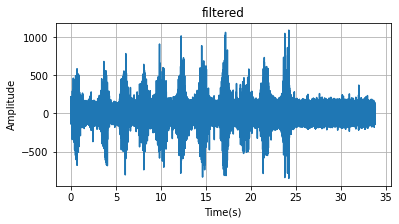

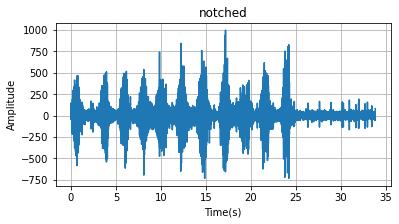

(5001, 66)


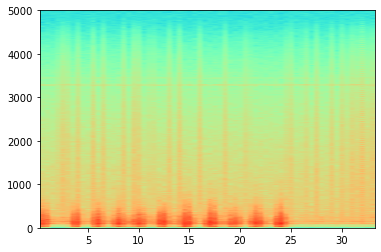

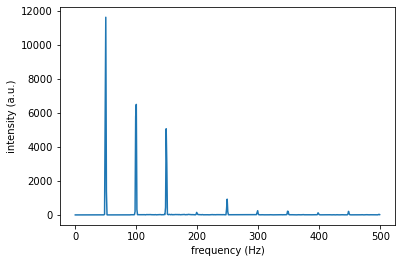

(129, 2639)


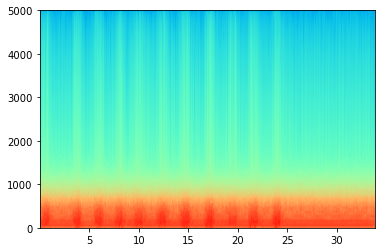

In [6]:
main("实验1-湿电极贴片02.wav")

[ -12    6   -3 ... -832 -661 -523]


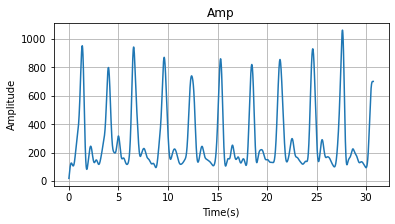

In [19]:
def EMG_amplitude(file_name):
    signal, framerate, nframes = read_wave(file_name)
    print(signal)
    
    signal_filtered = bandpass_filter(signal, framerate, 10, 500)
    signal_notch = notch_filter(signal_filtered, framerate, 50)
    signal_notch = notch_filter(signal_notch, framerate, 100)
    for electricity in range(50,701,50):
        signal_notch = notch_filter(signal_notch, framerate, electricity)
        
    
    signal_rectified = rectified(signal_notch)
    signal_box = lowpass_filter(signal_rectified,framerate, 2)
    #print(signal_box)
    #np.savetxt("./" + file_name + "_filtered.txt", signal_box)
    return signal_box, framerate

A, framerate = EMG_amplitude("实验3-punch.wav")

plot_wave(A, framerate, "Amp")

In [24]:
import numpy as np
import wave
import os
import shutil

def segment_data(waveData, segment_size=2000, overlap_size=500):
    """
    Segments waveform data into NumPy arrays with segment_size data points,
    and a specified overlap between adjacent segments.
    """
    data_len = len(waveData)
    print("num_segments=%d"%data_len)
    num_segments = int(np.ceil((data_len - segment_size) / overlap_size)) + 1
    print("num_segments=%d"%num_segments)
    segments = np.zeros((num_segments, segment_size), dtype=np.int16)
    for i in range(num_segments):
        start = i * overlap_size
        #print("start=%d"%start)
        end = start + segment_size
        #print("end=%d"%end)
        if end > data_len:
            segments[i, :data_len-start] = waveData[start:]
        else:
            segments[i, :] = waveData[start:end]
    return segments

def save_segments(segments, file_prefix):
    """
    Saves waveform data segments to multiple .txt files with the specified prefix.
    """
    for i, segment in enumerate(segments):
        filename = f"{file_prefix}_{i+1}.txt"
        #print(filename)
        np.savetxt(filename, segment, delimiter='\t', fmt='%d')
        #print("successful")
        
def classify(path, save_path, threshold):
    files = os.listdir(path)
    for file in files:
        if ".DS_Store" not in file:
            with open(path + "/" +file, "rb") as f:
                '''
                signal = []
                for line in f:
                    try:
                        sample = float(line.strip())
                        signal.append(sample)
                    except ValueError:
                        pass
                '''
                signal = [float(line.strip()) for line in f]   
                action_count = sum(1 for sample in signal if sample > threshold)
                if action_count / len(signal) > 0.3: #规则是一段信号里面有30%的action就定义为动作电位，可以后续根据结果来调整
                    shutil.copyfile(path + "/" +file, save_path + "/action/" + file)
                else:
                    shutil.copyfile(path + "/" +file, save_path + "/rest/" + file)
        else:
            continue
    
        
if __name__ == '__main__':
    #分割波形
    data0, framerate0 = EMG_amplitude("实验3-flexion.wav")
    data1, framerate1 = EMG_amplitude("实验3-open hand.wav")
    data2, framerate2 = EMG_amplitude("实验3-punch.wav")
    
    segments0 = segment_data(data0, segment_size=2000, overlap_size=500)
    segments1 = segment_data(data1, segment_size=2000, overlap_size=500)
    segments2 = segment_data(data2, segment_size=2000, overlap_size=500)
    
    save_segments(segments0, './segment_flexion/segment')
    save_segments(segments1, './segment_openhand/segment')
    save_segments(segments2, './segment_punch/segment')
    
    #label
    classify('./segment_flexion', './flexion', 400)
    classify('./segment_openhand', './openhand', 200)
    classify('./segment_punch', './punch', 400)

[-159 -141  -93 ...  305  235  180]
[-123 -490 -805 ... -138 -121 -120]
[ -12    6   -3 ... -832 -661 -523]
num_segments=360422
num_segments=718
num_segments=306766
num_segments=611
num_segments=307211
num_segments=612


In [ ]:
import numpy as np
import wave
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class WaveformDataset(Dataset):
    """
    PyTorch dataset for waveform data segments.
    """

    def __init__(self, segments):
        self.segments = segments

    def __len__(self):
        return len(self.segments)

    def __getitem__(self, idx):
        return self.segments[idx]


class WaveformCNN(nn.Module):
    """
    1-dimensional CNN for waveform data classification.
    """

    def __init__(self):
        super(WaveformCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16000, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = torch.flatten(x, start_dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


def train(model, device, train_loader, optimizer, epoch):
    """
    Trains the specified model for one epoch.
    """
    model.train()
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data.float())
        loss = nn.CrossEntropyLoss()(output, torch.tensor([0, 1]))

        #output = model(input_data.float())
        #loss = nn.CrossEntropyLoss()(output, target_labels)

        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))


train_set = WaveformDataset(segments)
train_loader = DataLoader(train_set, batch_size=2, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = WaveformCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(1, 101):
    train(model, device, train_loader, optimizer, epoch)